# Linear Perceptron

In [70]:
import numpy as np
import glob
from helperP import *

### Define linear perceptron class

In [71]:
class PrimalPerceptron(object):
    def __init__(self, x, y, w = None, b = None):
        num_sample, num_dims = x.shape
        

        np.random.seed(0)
        if not w: w = None
        if not b: b = None
        self.x, self.y, self.w, self.b = x, y, w, b
        self.w = np.random.rand(num_dims, 1)
        self.b = np.random.rand(1,1)
        self.lr = 0.1


    def predict(self):
        preds = np.dot(self.x, self.w) + self.b
        y_hat = np.where(preds < 0, -1, 1)
        return preds, y_hat

    def update(self):
        # update the weights and bias
        preds, y_hat = self.predict()
        update_y = np.where(y_hat != self.y, self.y, 0)
        dw = update_y * self.x
        db = update_y
        
        dw = np.mean(dw, axis = 0).reshape(self.w.shape[0],1)
        db = np.mean(db, axis = 0).reshape(1,1)
        self.w += dw * lr
        self.b += db * lr
        return

In [72]:
## Test ##
x = np.random.randn(10, 2)
y = np.random.randint(0, 2, size=(10, 1))
y[y == 0] = -1
p = PrimalPerceptron(x, y)
pred, y_pred = p.predict()
assert pred.shape[0] == 10
assert np.logical_or(y_pred == 1, y_pred == -1).all()
p.update()
assert p.w.shape[0] == x.shape[1]
assert p.b.shape[0] == 1
print('test passed')

test passed


### Train linear perceptron

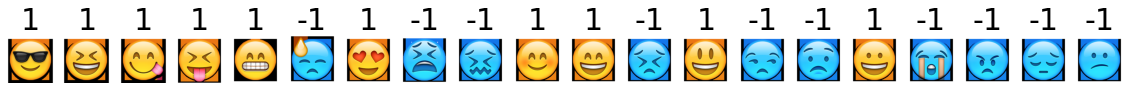

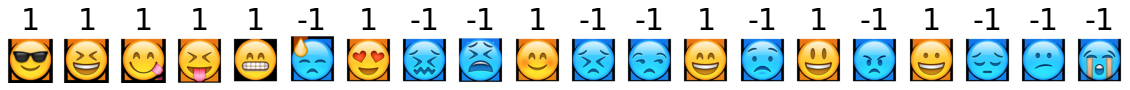

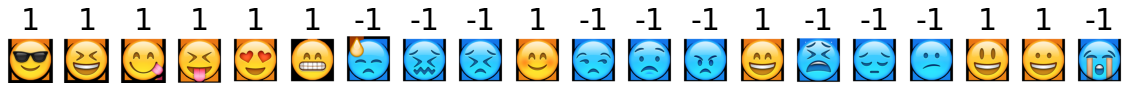

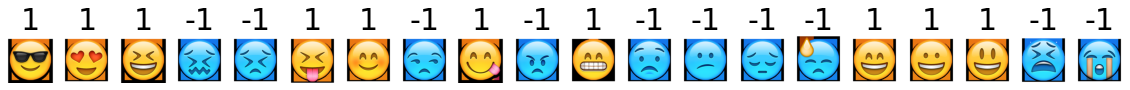

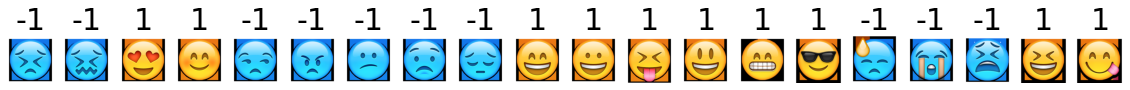

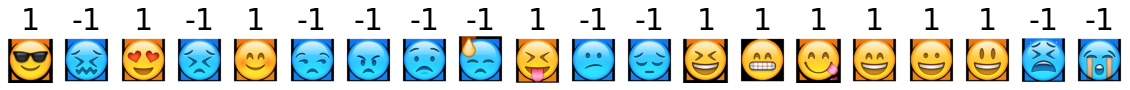

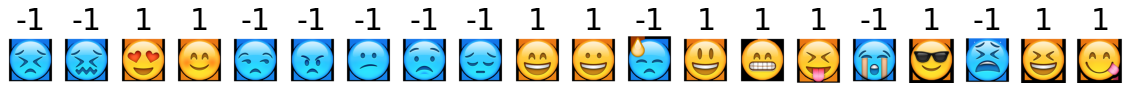

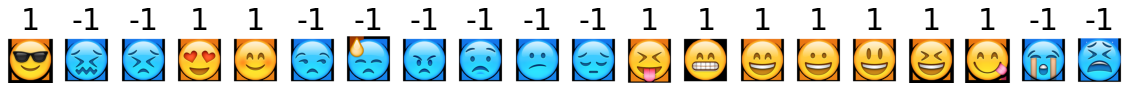

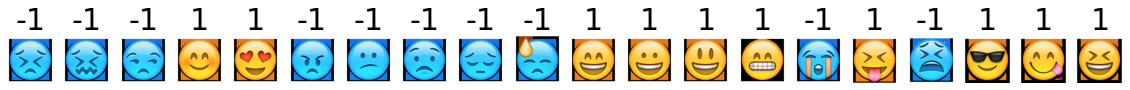

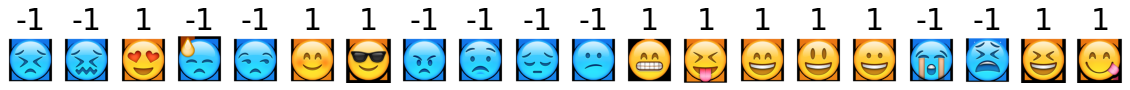

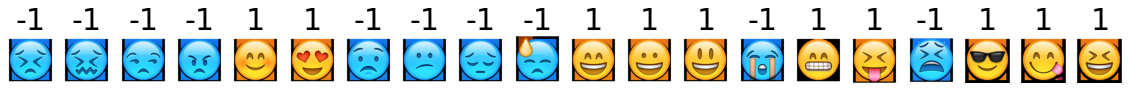

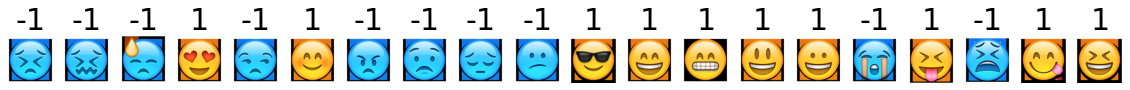

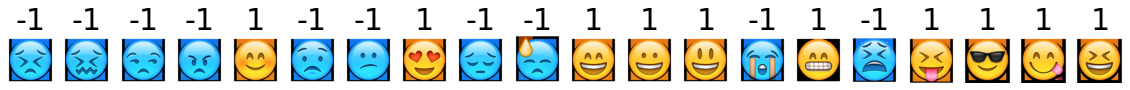

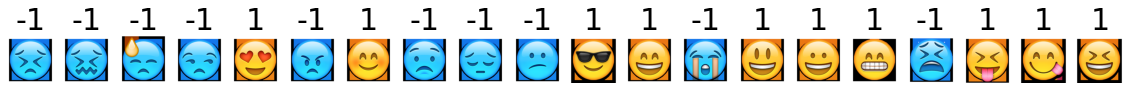

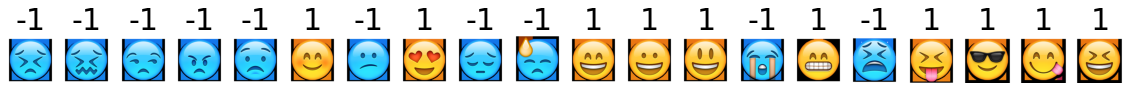

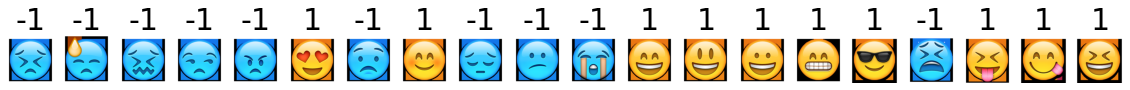

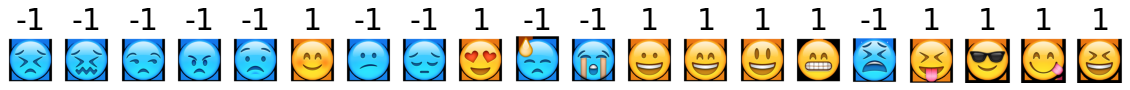

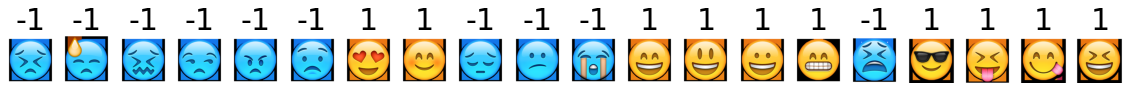

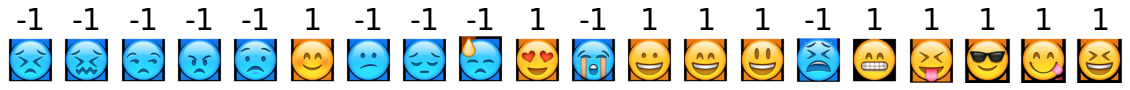

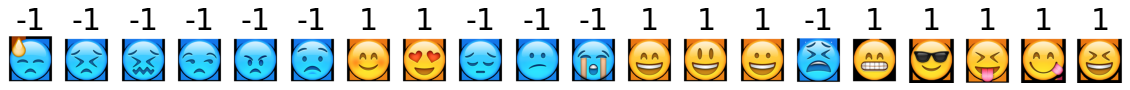

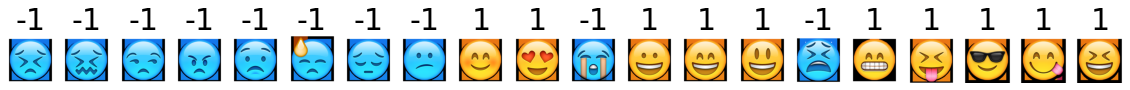

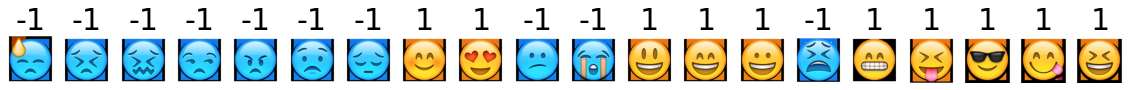

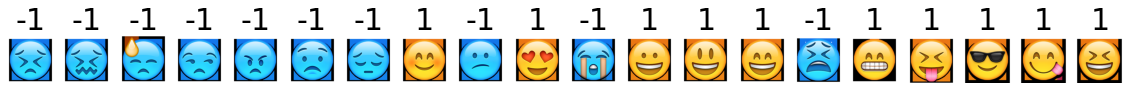

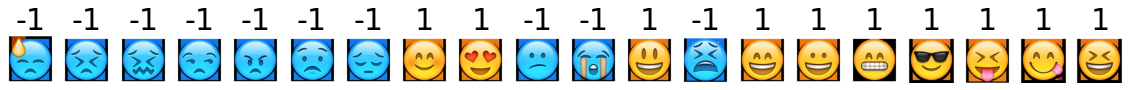

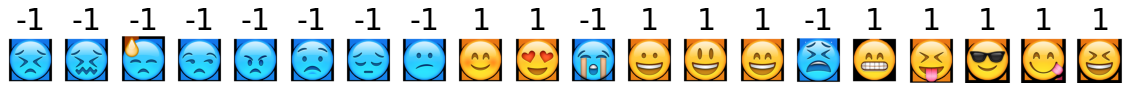

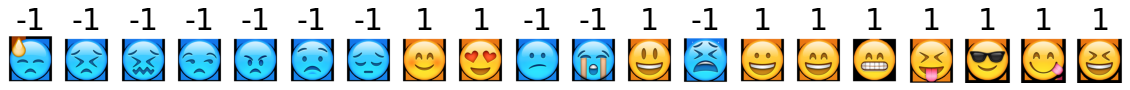

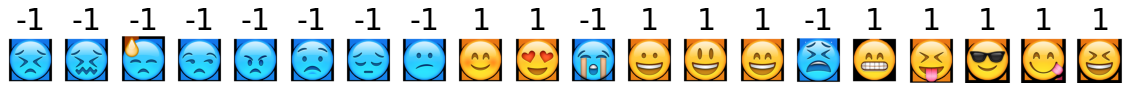

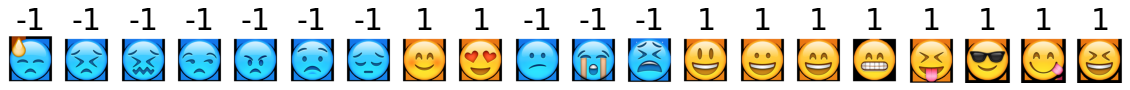

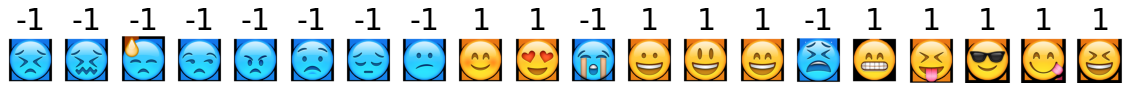

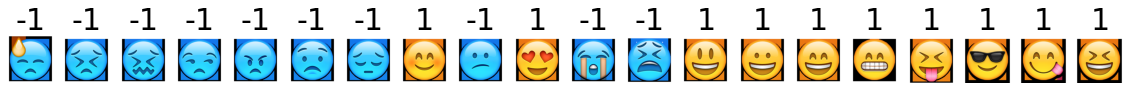

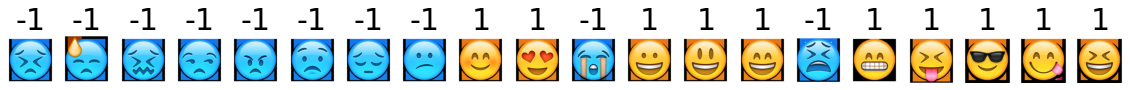

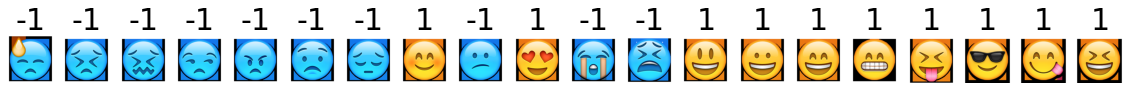

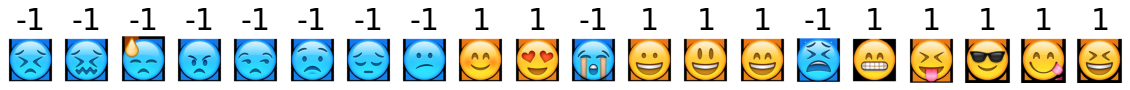

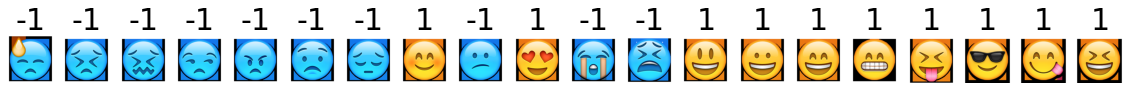

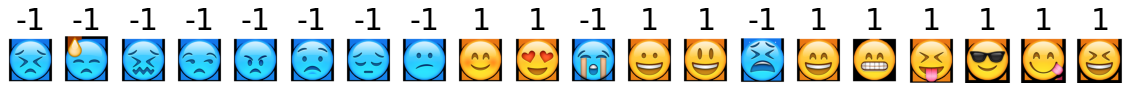

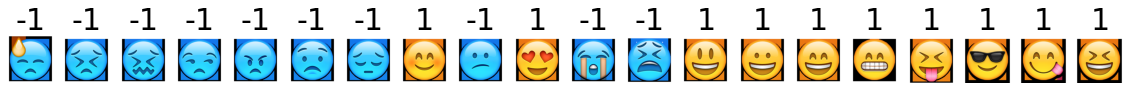

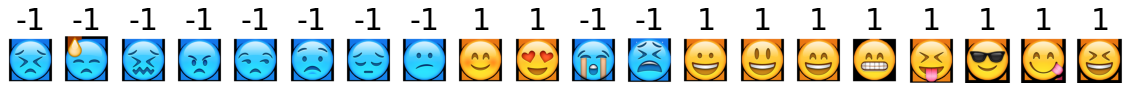

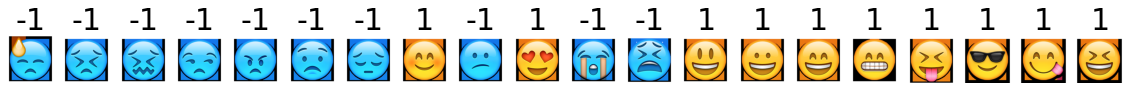

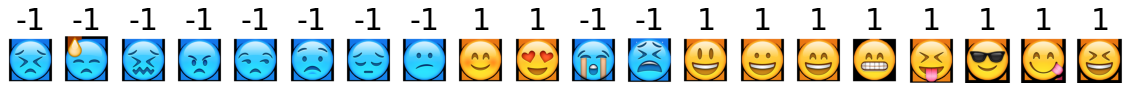

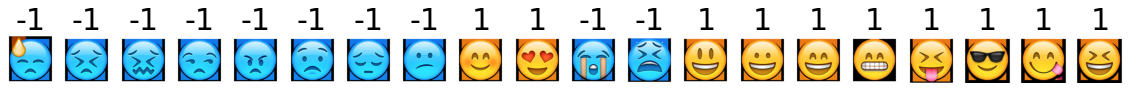

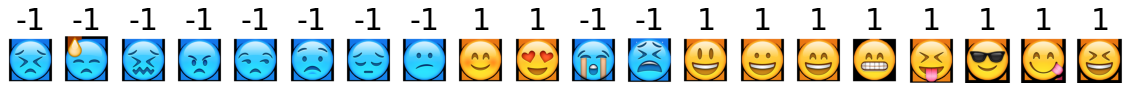

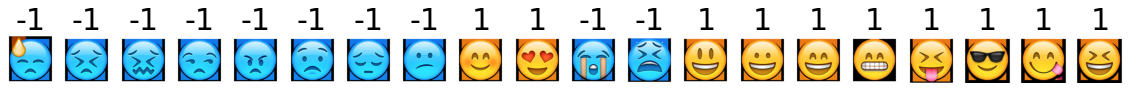

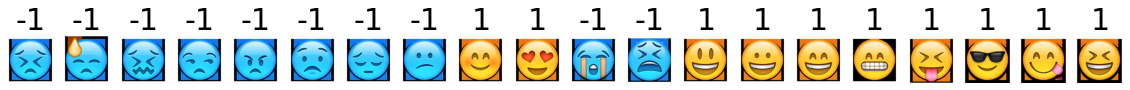

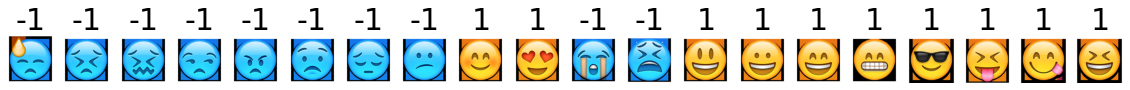

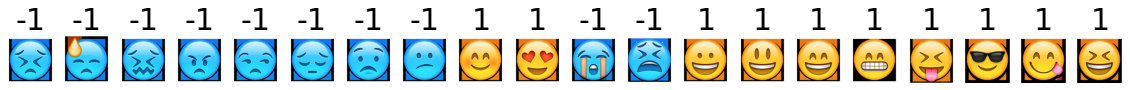

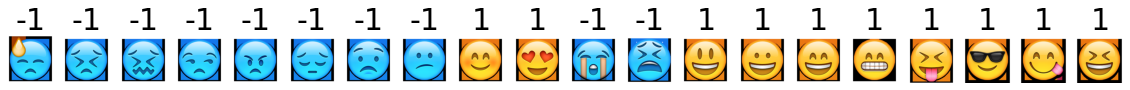

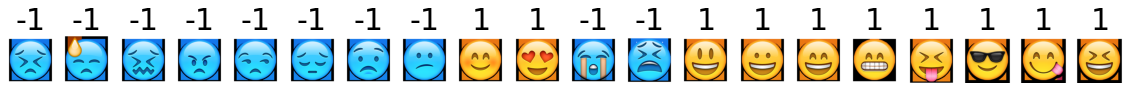

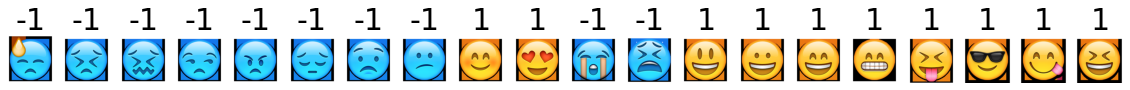

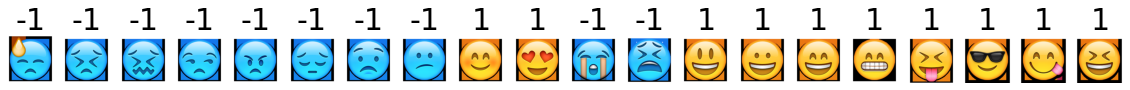

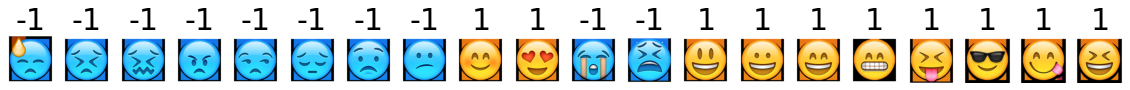

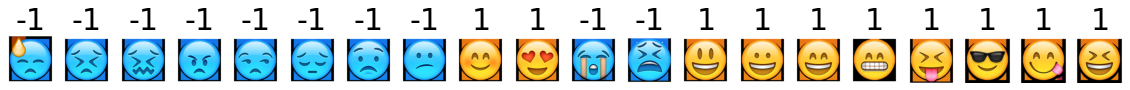

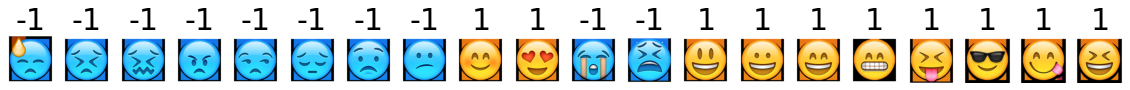

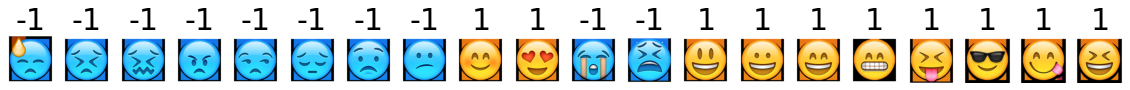

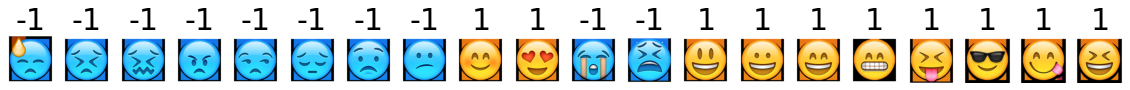

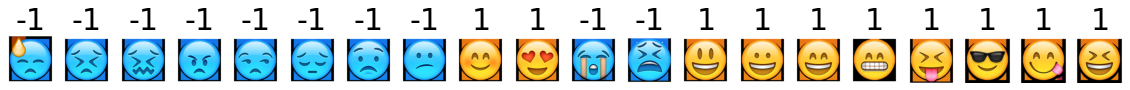

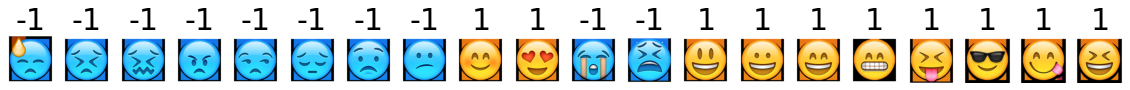

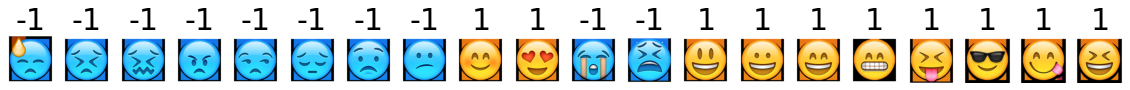

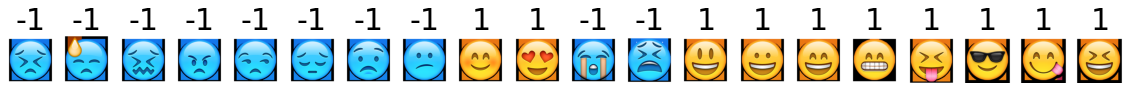

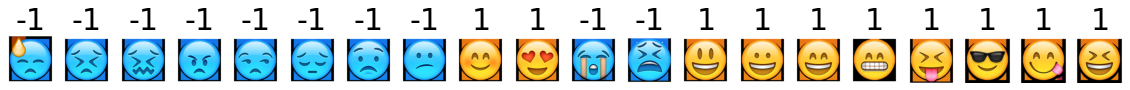

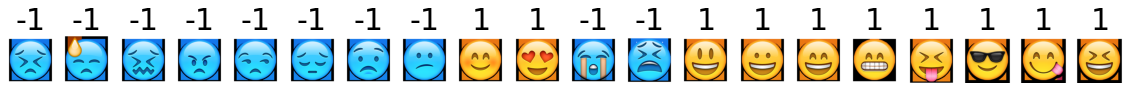

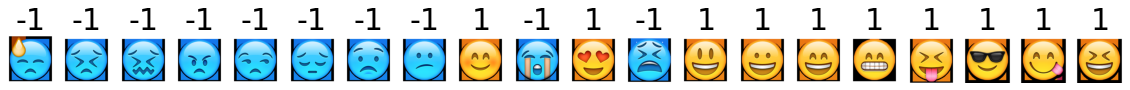

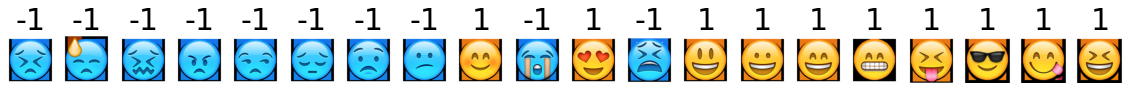

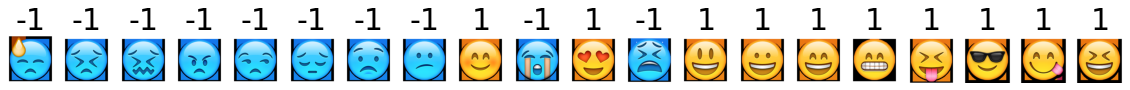

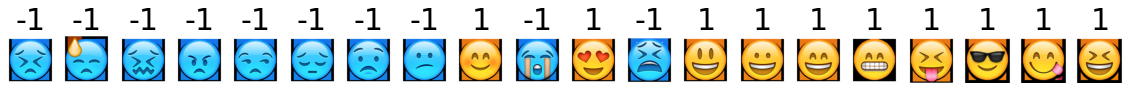

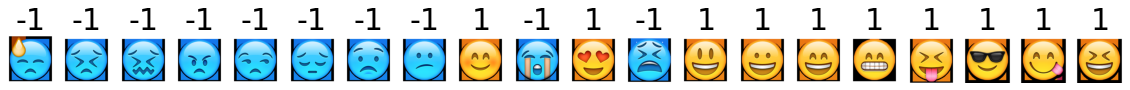

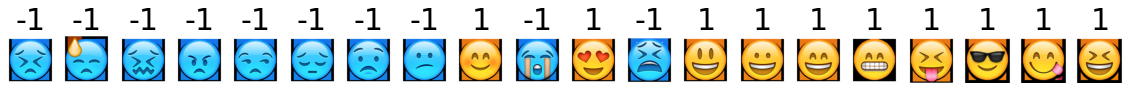

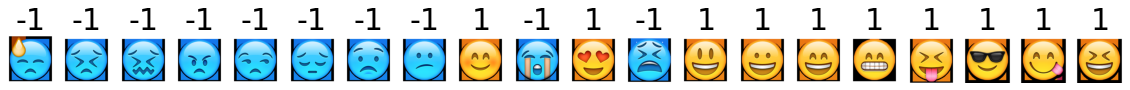

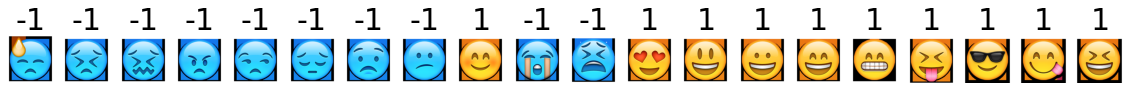

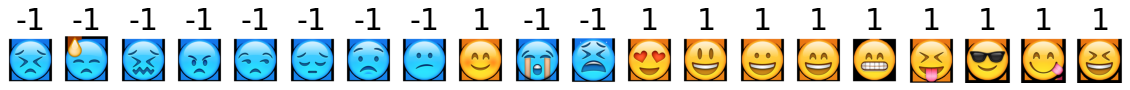

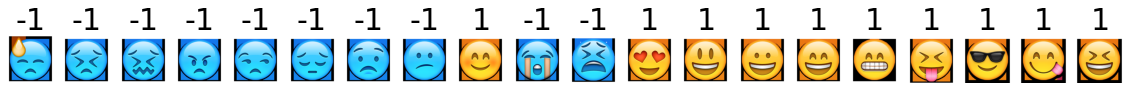

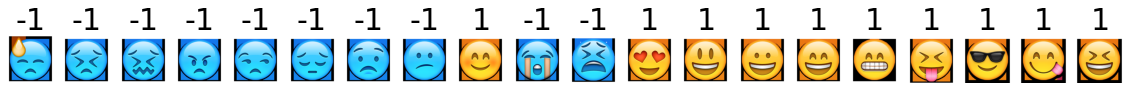

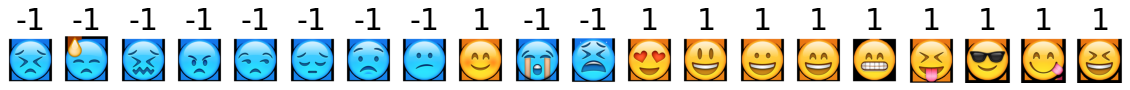

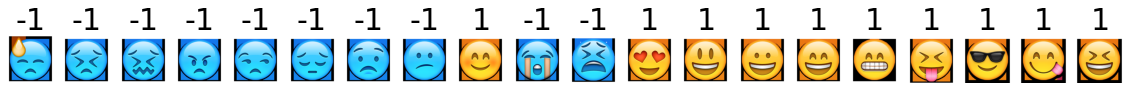

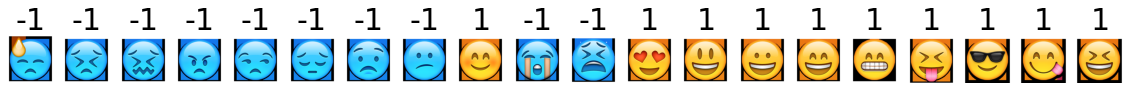

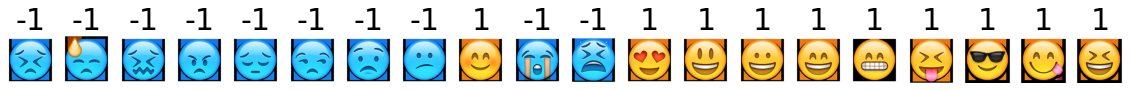

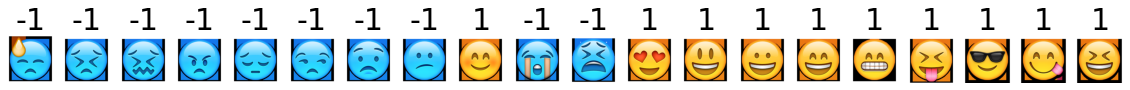

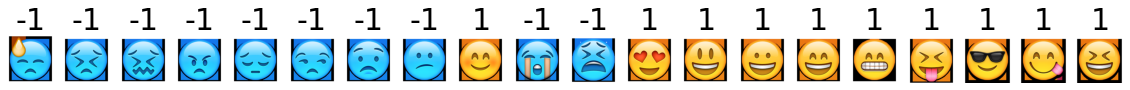

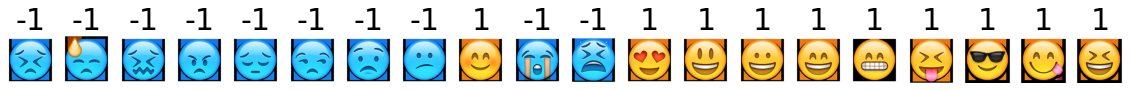

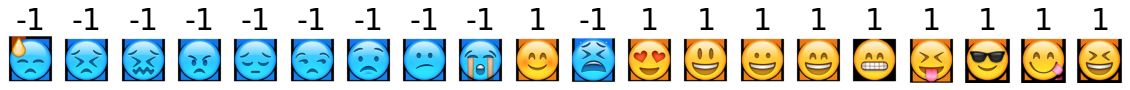

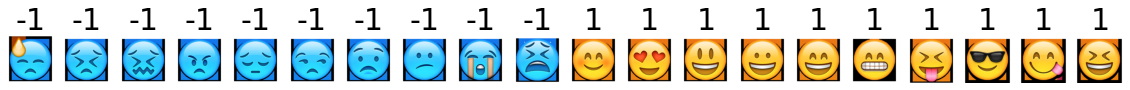

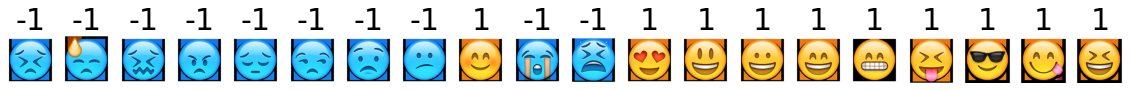

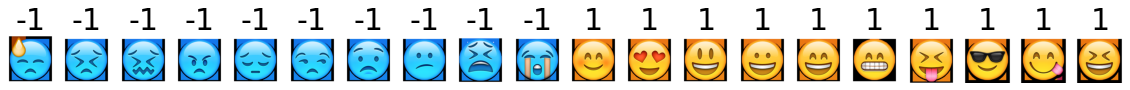

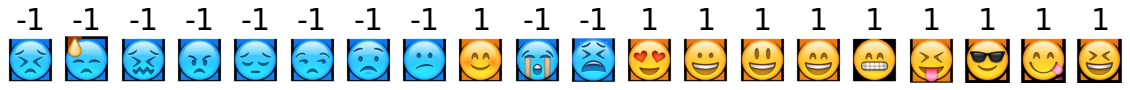

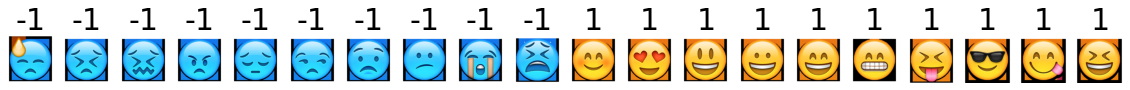

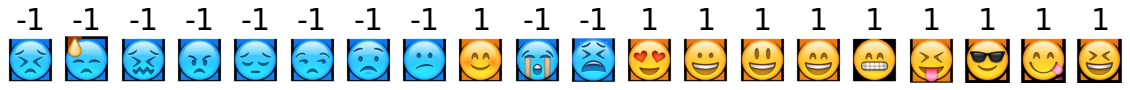

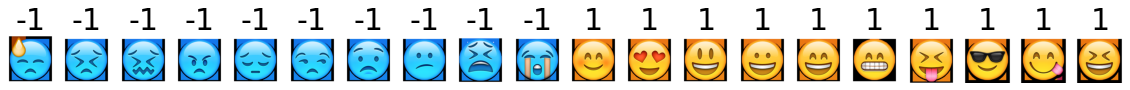

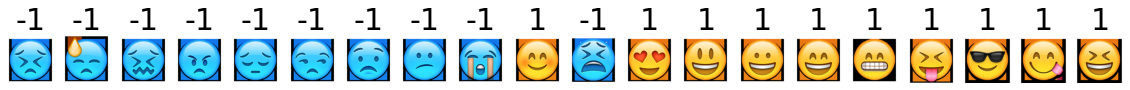

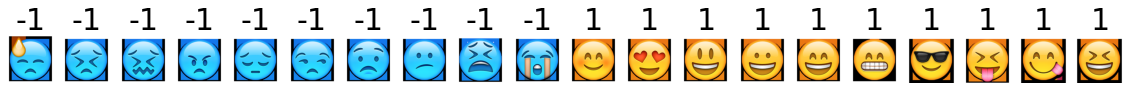

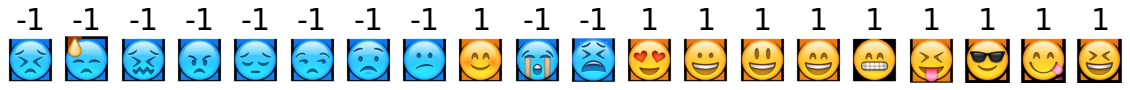

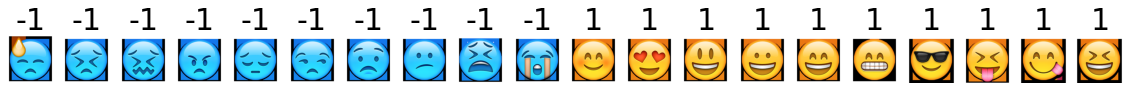

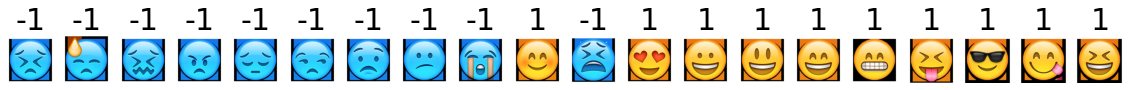

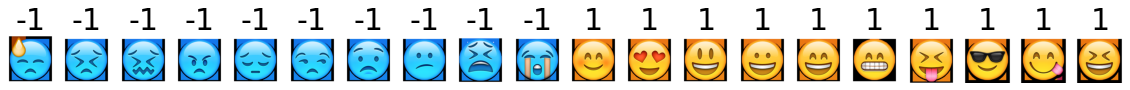

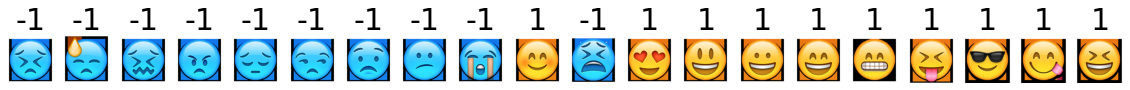

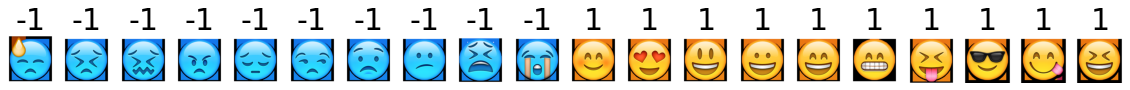

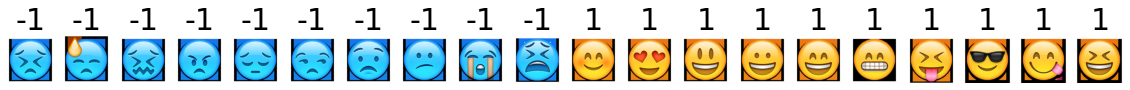

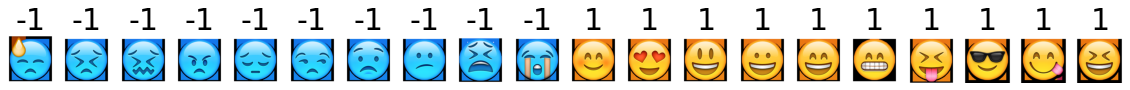

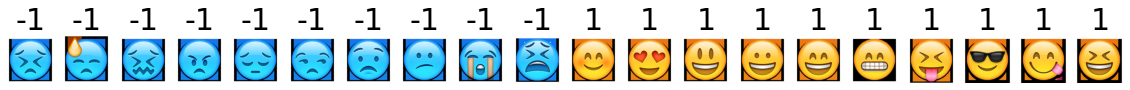

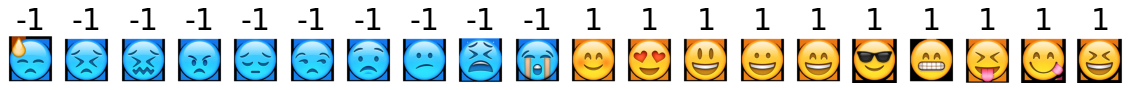

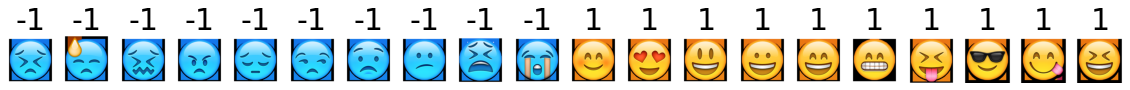

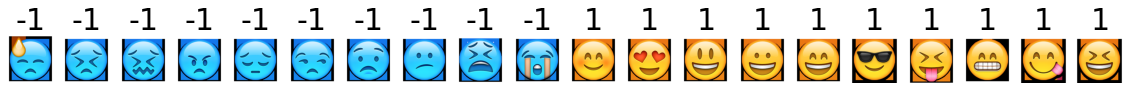

In [73]:
if __name__ == '__main__':
    # Load data
    file_names = glob.glob('DATASET/data_emoji/*/*.*')
    reduced, images, labels = load_image(file_names)
    
    reduced = reduced.reshape(reduced.shape[0], -1)
    # Instantiate Perceptron
    p = PrimalPerceptron(reduced, labels)
    # Iterate over data and update
    
    plt.rcParams["figure.figsize"] = [20, 20]  
    for i in range(100): 
        p.update()
        preds, y_hat = p.predict()
        visualize_results(images, preds, labels, None)
